### import libraries and open the file

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#### Edit the DF and get an overview of the type of values that the columns hold.

In [56]:
df.rename(columns={
    'Life expectancy at birth (years)':'Life_expectancy'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


See the uniqueness of the values

In [57]:
country=df.Country.unique()
year=df.Year.unique()
life=df['Life_expectancy'].unique
gdp=df.GDP.unique()

print(country)
print(year)
print(life)
print(gdp)



['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
<bound method Series.unique of 0     77.3
1     77.3
2     77.8
3     77.9
4     78.0
      ... 
91    54.9
92    56.6
93    58.0
94    59.2
95    60.7
Name: Life_expectancy, Length: 96, dtype: float64>
[7.78609322e+10 7.09799240e+10 6.97368114e+10 7.56434598e+10
 9.92103929e+10 1.22965000e+11 1.54788000e+11 1.73606000e+11
 1.79638000e+11 1.72389000e+11 2.18538000e+11 2.52252000e+11
 2.67122000e+11 2.78384000e+11 2.60990000e+11 2.42518000e+11
 1.21135000e+12 1.33940000e+12 1.47055000e+12 1.66029000e+12
 1.95535000e+12 2.28597000e+12 2.75213000e+12 3.55218000e+12
 4.59821000e+12 5.10995000e+12 6.10062000e+12 7.57255000e+12
 8.56055000e+12 9.60722000e+12 1.04824000e+13 1.10647000e+13
 1.94995000e+12 1.95065000e+12 2.07914000e+12 2.50573000e+12
 2.81925000e+12 2.86141000e+12 3.00245000e+12 3.43995000e+12
 3.75237000e+12 3.41801000e+1

Checking for any NaN values with isna()) function.

In [58]:
print(df['GDP'].isna().sum())
print(df['Life_expectancy'].isna().sum())

0
0


Let us look at some of the statistics from the descriptive analysis.

In [59]:
df.describe()

,Year,Life_expectancy,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


let's see if there is correlation between GDP and life expectancy

Let's plot the information 

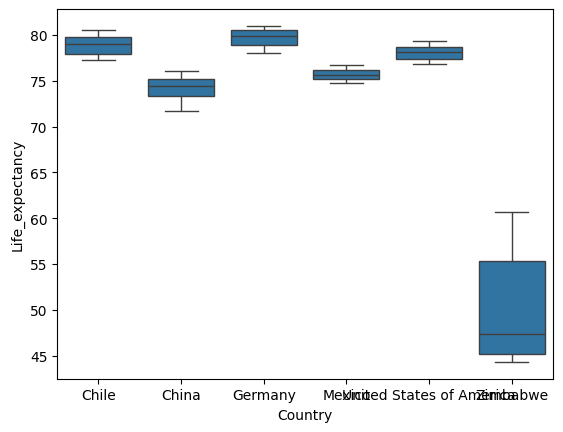

In [64]:
sns.boxplot(x='Country',y='Life_expectancy',data=df)

plt.show()

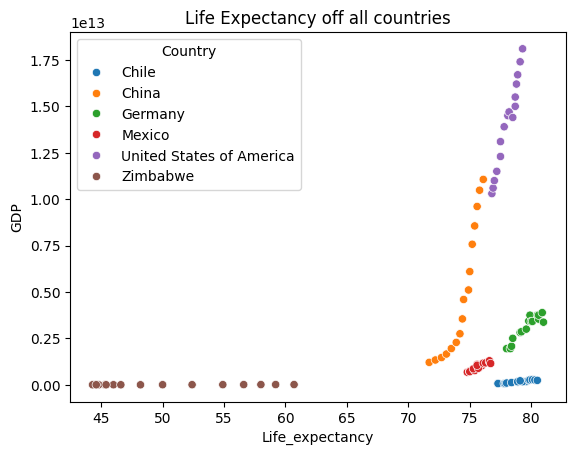

Let's zoom in on each country


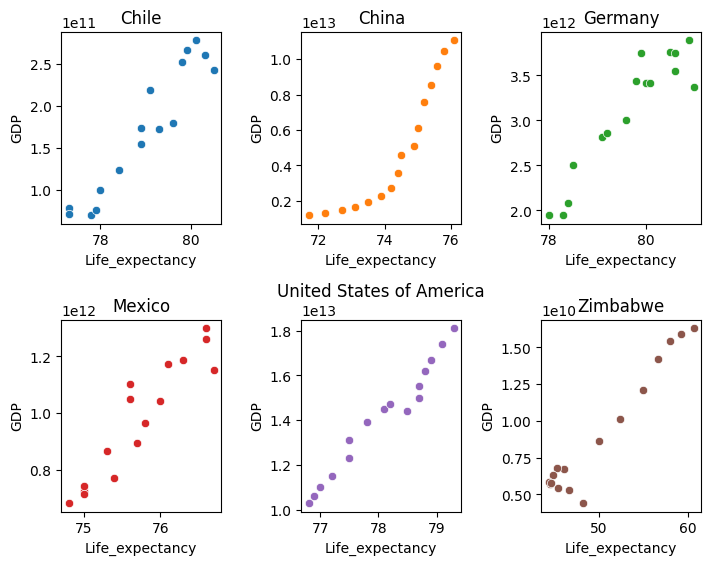

[0.9498766659254416, 0.9085255408648356, 0.9326988982561268, 0.9322377167847082, 0.9817092382430257, 0.9661998955858778]


In [60]:
countries=df.Country.unique()
x=1

correlation = []

sns.scatterplot(y='GDP',x='Life_expectancy',hue='Country',data= df)
plt.title('Life Expectancy off all countries')
plt.show()

palette = sns.color_palette()
print('Let\'s zoom in on each country')
for i in  countries:
    element = df[df.Country == i]
    plt.subplot(2,3,x)
    sns.scatterplot(x='Life_expectancy',y='GDP',data=element ,color=palette[x-1])
    plt.title(i)
    plt.subplots_adjust(top=5,bottom=4,left=4,right=5,hspace=0.5,wspace=0.5)
    x+=1
    corr_GDP_life, p = pearsonr(element.Life_expectancy, element.GDP)
    correlation.append(corr_GDP_life)
plt.show()


In [61]:
corr_countries = {key: value for key, value in zip(countries, correlation)}
print(corr_countries)

{'Chile': 0.9498766659254416, 'China': 0.9085255408648356, 'Germany': 0.9326988982561268, 'Mexico': 0.9322377167847082, 'United States of America': 0.9817092382430257, 'Zimbabwe': 0.9661998955858778}


### Has life expectancy increased over time in the six nations?
Life expectancy has increased in all countries over time, which is certainly a positive trend. However, it is important to note that there may be a maximum limit to this increase. If we project this information, we may encounter a point where life expectancy reaches a plateau and stops increasing.

### Is there a correlation between GDP and life expectancy of a country?
Yes, all the countries present a correlation higher than 0.90 witch mean that there is a strong correlation between the two variables 